In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [19]:
counts = pd.read_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/Data/processed/TCGA.HNSC.expression_log_all.txt', sep='\t', index_col=0)
counts


,sample_id,?|100133144,?|100134869,?|10357,?|10431,?|155060,?|340602,?|388795,?|391343,?|57714,...,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,TCGA-4P-AA8J-01A-11R-A39I-07,2.052764,3.794229,6.953486,10.481860,8.061857,2.568008,2.409717,0.000000,8.114133,...,8.143949,9.443184,4.680859,7.241859,9.517848,3.069513,8.714390,13.503428,9.784995,8.490450
TCGA-BA-4074,TCGA-BA-4074-01A-01R-1436-07,3.792470,3.678985,8.397311,10.913398,5.333027,0.000000,0.470303,0.000000,7.502705,...,11.058979,10.221756,4.637709,7.436845,8.575055,2.491751,9.654747,11.298022,8.020097,10.089212
TCGA-BA-4075,TCGA-BA-4075-01A-01R-1436-07,3.735176,2.251749,8.446306,10.544675,6.298598,0.000000,1.051024,0.000000,6.919567,...,9.573651,9.397007,4.453063,7.435037,9.137606,1.382889,8.932923,12.534072,8.197924,9.938555
TCGA-BA-4076,TCGA-BA-4076-01A-01R-1436-07,3.753102,2.408168,8.124209,10.236995,6.823902,0.000000,2.052555,0.000000,7.368419,...,8.910097,10.013546,5.591724,8.345547,10.493755,5.176195,9.498949,11.385614,9.394840,9.965145
TCGA-BA-4077,TCGA-BA-4077-01B-01R-1436-07,3.749995,3.656187,8.333357,9.739284,5.618333,0.000000,2.277955,0.000000,8.383756,...,10.373202,10.662944,5.515845,7.726423,10.475733,5.753163,9.592334,12.972371,9.577871,9.438738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JV,TCGA-UF-A7JV-01A-11R-A34R-07,2.181866,3.921227,7.134765,10.103681,8.877990,0.000000,2.838367,0.000000,9.505700,...,9.155863,9.956240,4.589182,7.877517,9.703622,0.822934,9.205659,13.211461,9.504173,9.246418
TCGA-UP-A6WW,TCGA-UP-A6WW-01A-12R-A34R-07,3.543780,4.187609,6.757063,10.422654,7.441965,0.000000,0.431463,0.763072,6.450243,...,9.510525,11.149855,4.724890,7.302401,9.547471,8.381629,8.708115,12.378135,10.118733,8.919146
TCGA-WA-A7GZ,TCGA-WA-A7GZ-01A-11R-A34R-07,5.530118,5.209453,7.452134,9.293127,7.681730,0.898324,2.411345,0.000000,9.422269,...,9.101855,10.406141,5.317481,7.952170,10.432083,2.155652,9.104494,11.782511,10.840644,9.476639


In [20]:
top2000_genes = pd.read_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/Data/processed/top2000genesByVariance.txt', sep='\t', index_col=0, header=None)
top2000_genes = top2000_genes.index.tolist()


In [21]:
patients_to_keep = pd.read_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/project_5/Amy/patients.txt', sep='\t', index_col=0, header=None)
patients_to_keep = patients_to_keep.index.tolist()


In [22]:
counts = counts.loc[patients_to_keep, top2000_genes]


In [23]:
counts = counts.loc[patients_to_keep]
counts


,KRT14|3861,KRT13|3860,KRT6A|3853,KRT16|3868,SMR3B|10879,KRT17|3872,KRT5|3852,KRT6B|3854,COL1A1|1277,KRT4|3851,...,COPE|11316,ATP2A3|489,SELM|140606,H2AFV|94239,SLC2A3|6515,LMAN1|3998,PPP1R12B|4660,PPP1R14B|26472,ARPC5|10092,COX6A2|1339
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,17.040793,15.833878,17.221417,15.560228,0.000000,18.379319,17.943677,15.315461,18.470683,5.046334,...,11.546108,9.727429,11.156279,11.419081,9.497083,10.855484,9.815900,11.754474,12.414751,8.084957
TCGA-BA-4074,16.222176,6.870365,15.826472,12.000430,0.000000,16.137808,16.386674,13.770912,16.258715,1.345680,...,12.790595,6.898595,12.697296,13.755680,9.809604,11.520614,6.168125,10.434764,13.869150,3.302144
TCGA-BA-4075,17.691675,6.429957,17.379903,15.256422,0.000000,17.342873,17.185330,14.974692,13.936187,3.847937,...,11.910736,6.906734,9.920316,13.083938,10.478466,10.577429,7.496279,11.715151,13.509293,5.226759
TCGA-BA-4076,17.678077,12.511016,18.694943,17.440034,0.000000,18.607312,17.911614,16.810936,14.726564,8.011881,...,12.020313,7.755809,10.376223,12.205497,8.382308,11.566972,7.040640,10.446804,12.739734,0.000000
TCGA-BA-4077,17.432004,16.699681,18.054912,15.970301,0.566766,16.976139,18.192770,16.384635,14.816109,10.744926,...,11.811844,9.451685,10.593195,11.854339,8.736094,11.699499,8.950538,10.177270,12.495920,3.342469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT,18.221318,9.995640,18.011784,17.230189,0.518938,17.380157,17.740762,17.270961,16.054112,10.666437,...,12.107443,9.671928,8.984783,11.415145,9.160953,10.359255,7.433477,11.747996,12.536973,1.846955
TCGA-UP-A6WW,13.052500,15.514905,16.284943,14.956435,0.000000,16.807871,18.806587,14.287157,15.951339,3.683786,...,11.709153,10.797110,11.345161,12.408051,8.642936,12.013982,10.655271,10.748252,12.097133,3.644122
TCGA-WA-A7GZ,18.704539,14.828578,17.962501,15.979365,0.000000,18.008987,18.685471,15.614782,16.746659,11.169261,...,11.457468,8.438808,7.957195,11.182196,8.275449,11.835995,9.844485,11.088861,11.589548,5.890332


# PCA

In [27]:
# calculate PCA for the top 2000 genes
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(counts)


PCA()

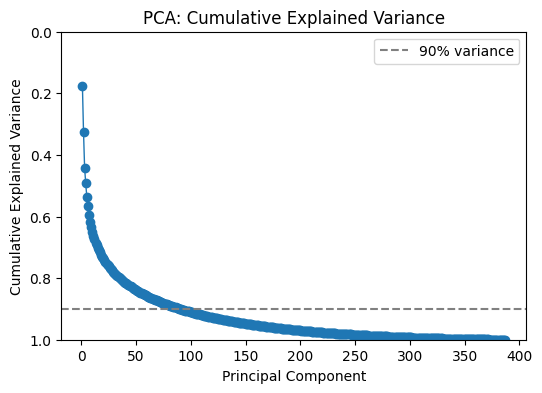

In [31]:
import numpy as np
import matplotlib.pyplot as plt

evr = pca.explained_variance_ratio_
cumvar = np.cumsum(evr)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(evr)+1), cumvar, marker='o', linewidth=1)
plt.axhline(0.90, color='gray', linestyle='--', label='90% variance')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Cumulative Explained Variance")
plt.ylim(1, 0)  # Reversed y-axis: 1 at bottom, 0 at top
plt.legend()
plt.show()


In [ ]:
# check how many components are needed for 90% variance
num_components = np.argmax(cumvar >= 0.80) + 1
print(f"Number of components needed for 80% variance: {num_components}")


Number of components needed for 90% variance: 36


In [ ]:
PC_subset = pca.transform(counts)[:, :num_components]
PC_subset.shape


(387, 36)

In [ ]:
PC_df = pd.DataFrame(PC_subset, index=counts.index, columns=[f'PC{i+1}' for i in range(num_components)])
PC_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,26.598411,-22.877210,-0.578889,1.355819,14.338859,11.862614,19.961129,5.764783,-11.563897,7.438937,...,1.399854,-1.042697,-4.527581,1.973180,3.290999,-6.204219,3.085159,3.551864,5.918126,2.420791
TCGA-BA-4074,-12.167557,-34.067932,-6.116876,-12.142741,2.158705,23.998579,4.738449,0.958005,-2.261223,20.093988,...,1.444891,-11.191240,8.414513,-0.781585,-2.579944,-9.322259,2.186265,7.986461,6.368920,2.790570
TCGA-BA-4075,-4.536258,-39.425484,-10.844956,-20.751842,2.805745,23.171738,-15.794427,-4.714202,-15.940253,7.142424,...,-3.839008,-5.080123,1.708593,0.175647,7.726620,-3.483391,5.356761,-4.298106,5.092804,-6.081731
TCGA-BA-4076,-27.484337,10.899081,-25.749578,-4.556297,-6.865086,5.556402,-6.566272,-16.258028,-6.606899,-5.049970,...,0.981118,-3.253685,6.196026,-3.967262,-8.999307,-5.437916,7.841385,0.636999,4.511082,6.218921
TCGA-BA-4077,-1.579689,2.466259,3.903651,7.498580,10.952675,-10.032480,-0.162748,19.548591,-14.226699,-0.493957,...,5.720615,-0.470224,3.367557,8.230726,-0.317366,-3.036933,2.132965,-0.118427,9.016191,-2.285469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT,-7.117704,0.532719,-26.821629,-9.491319,14.561163,-10.882905,13.215604,7.883228,5.650354,1.939285,...,2.254447,-2.358918,-1.619444,-2.567381,-5.265529,8.824841,-2.514761,-1.616781,-3.507361,2.647804
TCGA-UP-A6WW,-26.020624,-15.684109,19.663563,-24.086077,7.332528,-13.280610,21.070028,10.382518,-2.418995,-2.031575,...,-3.971892,-3.813454,5.819074,3.033680,-1.064118,-3.780561,-0.859816,0.487604,0.899625,4.860185
TCGA-WA-A7GZ,20.357235,1.099707,-13.116333,4.412999,-9.034357,5.688979,-2.425808,1.413872,7.374495,-1.594353,...,-7.729545,3.480514,-3.078560,-0.271447,-5.438959,3.147383,4.404510,4.036297,0.823165,3.585350


In [ ]:
PC_df.to_csv('/Users/harrisonma/Documents/PhD Classes/2025 Spring/BNFO 285/BNFO285_Projects/project_5/Harrison/PCA_subset.tsv', sep='\t')


In [ ]:
# check which genes are in PC1
PC1 = pca.components_[0]
PC1_genes = np.argsort(np.abs(PC1))[-10:]  # Get indices of top 10 genes by absolute value
PC1_genes = [top2000_genes[i] for i in PC1_genes]
print("Top 10 genes in PC1:", PC1_genes)


Top 10 genes in PC1: ['CSRP3|8048', 'DES|1674', 'XIRP2|129446', 'MYL2|4633', 'NRAP|4892', 'MYH7|4625', 'MYL1|4632', 'ACTA1|58', 'MYH1|4619', 'MYH2|4620']
